<a href="https://colab.research.google.com/github/Barbosa6Andre/CustomerClassificationML/blob/main/CustomerClassificationML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Online Retail Customer Segmentation:

##Introduction

This notebook focuses on leveraging a dataset of online retail transactions to perform customer segmentation using unsupervised machine learning techniques. The project aims to analyze purchasing behaviors and create meaningful customer clusters to provide actionable business insights. By exploring this dataset, we will uncover patterns that can inform targeted marketing strategies, enhance customer engagement, and optimize resource allocation.

Dataset Overview

This dataset, originally collated by Dr. Daqing Chen from the School of Engineering at London South Bank University, documents transactions from an online retail company based in the UK. The company specializes in unique all-occasion gifts, and its clientele comprises both individuals and wholesalers. The dataset is widely regarded as a resource for studying purchasing trends, consumer behavior, and inventory management.

Attributes in the Dataset:
-	InvoiceNo: Unique 6-digit identifiers for transactions. Transactions marked with a “C” indicate cancellations.
-	StockCode: A 5-digit identifier for specific inventory items.
-	Description: Textual descriptions of the products sold.
-	Quantity: The number of items sold in each transaction.
-	InvoiceDate: Timestamps for transactions, useful for time-based trend analysis.
-	UnitPrice: The price per unit of the products sold.
-	CustomerID: A unique identifier for each customer.
-	Country: The country of origin for each customer.

Dataset Details:
-	Source: Kaggle: https://www.kaggle.com/datasets/thedevastator/online-retail-transaction-data/data
-	Scope: This dataset is ideal for performing exploratory data analysis (EDA), customer segmentation, and pattern identification across various customer demographics and behaviors.

##Problem Definition

Objective:

To understand and categorize customers into meaningful segments using unsupervised learning methods like clustering. This analysis aims to:
	1.	Identify groups of customers with similar purchasing behaviors.
	2.	Provide actionable insights to improve business operations and marketing strategies.
	3.	Highlight potential areas for customer engagement and retention.

Hypotheses:
-	Customers can be segmented into distinct groups based on purchasing frequency, monetary value, and recency.
-	Certain groups, such as wholesalers or loyal customers, may exhibit significantly higher spending patterns.
-	Customer segmentation can uncover opportunities for upselling, cross-selling, or re-engagement.

Constraints:
-	Only data from UK customers is considered (99% of the dataset), as this ensures consistency and relevance.
-	The dataset is analyzed under an unsupervised framework, meaning no predefined labels exist for customer segments.

##Why is This MVP Important?

This project is a Minimum Viable Product (MVP) for demonstrating the value of customer segmentation. By clustering customers based on behavioral data:
-	Businesses can better allocate marketing resources.
-	Insights into customer behavior can lead to more personalized interactions.
-	Decision-making processes are enhanced by relying on data-driven approaches.

Unsupervised learning ensures an unbiased approach to customer segmentation, allowing the data to naturally define patterns and clusters without pre-imposed assumptions.

##Notebook Layout

The notebook follows a structured layout to ensure clarity and progression:

  0.	Preparing the Environment:
The necessary libraries and configurations are set up to create a smooth workflow.

  1.	Handling Missing Values, Duplicates, Wrong Value Types, and Outliers:
Data cleaning is performed to ensure the dataset is consistent, accurate, and ready for analysis.

  2.	Feature Engineering and RFM Segmentation:
Customer behavior is quantified using the Recency, Frequency, and Monetary (RFM) framework. This forms the foundation for manual segmentation and comparison with machine learning-based clustering.

  3.	Data Preprocessing and Classification Algorithms:
The RFM metrics are scaled and prepared for clustering algorithms like K-Means and DBSCAN, with their respective outputs evaluated for quality.

  4.	Customer Segmentation with Machine Learning:
Insights are derived from clustering results, with clusters analyzed and visualized to understand distinct customer behaviors.

  5.	Conclusion:
A summary of findings highlights the key takeaways and the impact of unsupervised learning in uncovering customer patterns.

  6.	Recommendations:
Practical, actionable strategies are proposed for each customer cluster to improve business operations, marketing, and customer engagement.

#Customer Segmentation With Machine Learning MVP

## 0. Preparing enviroment

In [134]:
#import necessary modules
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as pp
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [272]:
#import data into colab enviroment
url = 'https://media.githubusercontent.com/media/Barbosa6Andre/CustomerClassificationML/refs/heads/main/online_retail.csv'
df = pd.read_csv(url, sep = ',')
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [136]:
#basic info of the dataframe
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


,index,Quantity,UnitPrice,CustomerID
count,541909.00000,541909.000000,541909.000000,406829.000000
mean,270954.00000,9.552250,4.611114,15287.690570
std,156435.79785,218.081158,96.759853,1713.600303
min,0.00000,-80995.000000,-11062.060000,12346.000000
25%,135477.00000,1.000000,1.250000,13953.000000
50%,270954.00000,3.000000,2.080000,15152.000000
75%,406431.00000,10.000000,4.130000,16791.000000
max,541908.00000,80995.000000,38970.000000,18287.000000


Main insights from the initial description of the data:

**The Index column** is a unique identifyer for each entry. It is important to have this identifyer, but after the data is entered in the colab enviroment it is possible to see that another index column is created. Because of that it is possible to eliminate this dimension once we have checked missings and duplicates. This will allow for lighter operations throughout the project.

**The InvoiceNo column** has an object type. This is due to the fact that it includes invoices that were canceled as well as all the other valid invoices. The canceled invoices have a "c" prefix, because of that the data type is defined as an object.

****

## 1.Handling missing values and duplicates

In [137]:
#identify missing values
missings = df.isnull().sum()
print(f'There are {df.isnull().sum().sum()} missing values in the dataframe')
missings

There are 136534 missing values in the dataframe


,0
index,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


Considering we are developing a customer segmentation algorythim we will not be taking into consideration unkown customers since we could not identify clear patterns through time. These Na customerIds will be droped in the next cell.

Considering the minimal size for the missing product descriptions we will choose to drop the missing description rows.

In [138]:
#identify missing values and treat them. Considering that the missing values are in the description and customer id columns it is better to drop them.
#Since the dataset has a large number of entries thiss will not affect the insight potential of the operation as a whole.
already_dropped = 0
og_total = df.shape[0]
while already_dropped == 0:
    n_nulls = df.isnull().sum().sum()
    print(f"{n_nulls} rows have been dropped")
    new_total = df.shape[0] - n_nulls
    already_dropped = 1

print(f'The dataframe has now a total of {new_total} rows. A total of {(new_total/og_total)*100: .2f}% of the original dataframe')
df.dropna(inplace=True)

136534 rows have been dropped
The dataframe has now a total of 405375 rows. A total of  74.80% of the original dataframe


In [139]:
#Checked to see if there were duplicated rows and none were found.
n_duplicates = df.duplicated().sum()
print(f'Total duplicate rows: {n_duplicates}')

Total duplicate rows: 0


1.2 Reduce dimensions

In [140]:
# Drop the 'index' column
df.drop(columns=['index'], inplace=True)

# Confirm the column has been removed
print("Columns after dropping 'index':")
print(df.columns)

Columns after dropping 'index':
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [141]:
#value counts for country column
df['Country'].value_counts()

,count
Country,
United Kingdom,361878
Germany,9495
France,8491
EIRE,7485
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1480


In [142]:
# Droping purchases from outside of the UK
df = df[df['Country'] == 'United Kingdom']

# Reset the index for the filtered DataFrame (optional, for cleaner handling)
df.reset_index(drop=True, inplace=True)

# Confirm the filtering
print(f"Total rows after leaving only UK purchases:")
df['Country'].value_counts()

Total rows after leaving only UK purchases:


,count
Country,
United Kingdom,361878


In [143]:
# Drop the 'Country' column
df.drop(columns=['Country'], inplace=True)

# Confirm the column has been removed
print("Columns after dropping 'Country':")
print(df.columns)

Columns after dropping 'Country':
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID'],
      dtype='object')


1.3 Corecting incorrect value types, typos, and incorrect values

In [144]:
#Convert the InvoiceDate column from object to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361878 entries, 0 to 361877
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 19.3+ MB


###Handling outliers

In [145]:
# Function to identify outliers using the IQR method
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers[column]

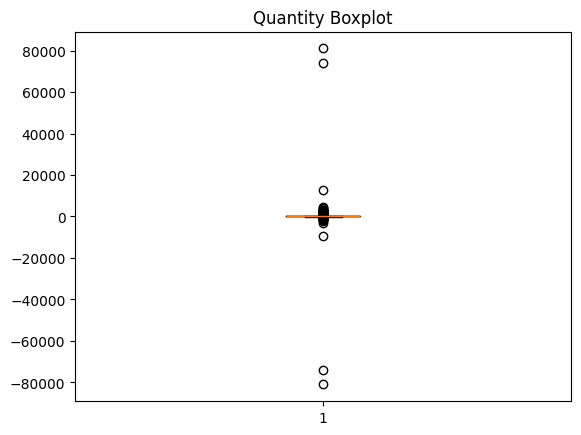

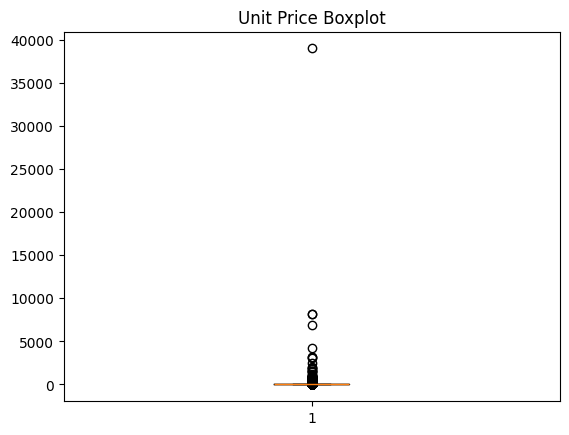

In [146]:
#plot boxplot graph for quantity
plt.boxplot(df['Quantity'])
plt.title('Quantity Boxplot')
plt.show()

#plot boxplot for unit price
plt.boxplot(df['UnitPrice'])
plt.title('Unit Price Boxplot')
plt.show()

The Quantities over 1000 have been dropped
Numbers of rows dropped: 18500
New total number of rows: 335118


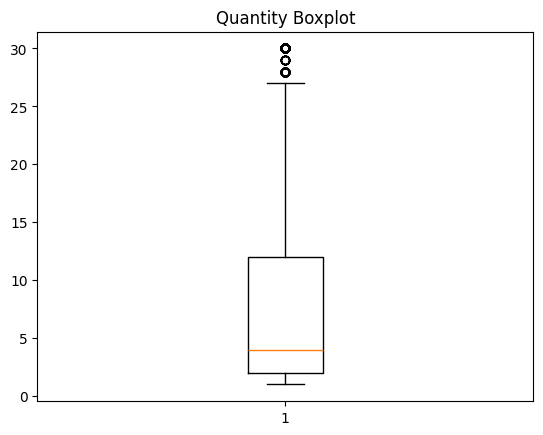

In [148]:
#drop negative numbers and quantity above 30 - We consider this as a threshold since the retailer
#focuses largely on smaller quantities and limiting this will allow for better machine learning clustering
quantity_dropped = df[(df['Quantity'] > 30) | (df['Quantity'] < 0)].index
df.drop(quantity_dropped, inplace=True)
print(f'The Quantities over 30 have been dropped')
print(f'Numbers of rows dropped: {len(quantity_dropped)}')
print(f'New total number of rows: {len(df)}')

#print boxplot again
plt.boxplot(df['Quantity'])
plt.title('Quantity Boxplot')
plt.show()

The Quantities over 75 have been dropped
Numbers of rows dropped: 8101
New total number of rows: 326851


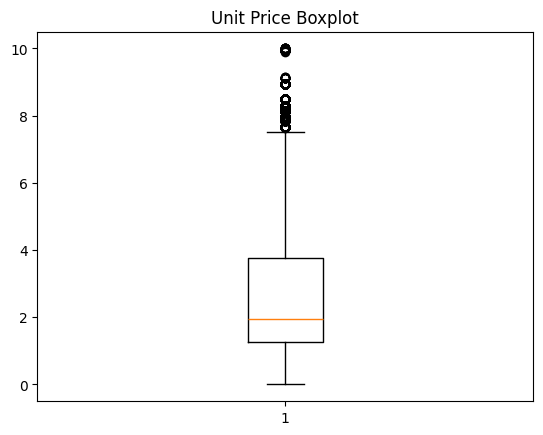

In [150]:
#drop unit prices over 75
unitPrice_dropped = df[(df['UnitPrice'] > 10) | (df['UnitPrice'] < 0)].index
df.drop(unitPrice_dropped, inplace=True)
print(f'The Quantities over 75 have been dropped')
print(f'Numbers of rows dropped: {len(unitPrice_dropped)}')
print(f'New total number of rows: {len(df)}')

#print boxplot again
plt.boxplot(df['UnitPrice'])
plt.title('Unit Price Boxplot')
plt.show()

In [151]:
# Identify outliers for 'Age' and 'Income'
quantity_outliers = find_outliers(df, 'Quantity')
unitPrice_outliers = find_outliers(df, 'UnitPrice')

# Display outliers
print("Outliers in 'Quantity':")
print(quantity_outliers)
print("\nOutliers in 'UnitPrice':")
print(unitPrice_outliers)

Outliers in 'Quantity':
437       30
476       28
1282      30
1286      30
1290      30
          ..
360525    30
360713    30
360912    30
361796    30
361817    30
Name: Quantity, Length: 1017, dtype: int64

Outliers in 'UnitPrice':
5         7.65
16        9.95
19        7.95
20        7.95
43        7.65
          ... 
361787    8.50
361788    8.50
361815    8.50
361833    9.95
361876    8.95
Name: UnitPrice, Length: 20696, dtype: float64


##2.Feature Engineering and manual rfm segmentation:

After treating the original dataset we can engineer better atributes based on the type of customer segmentation and behaviour we want to analyse.

We will use the rfm method to map the respective R - recency, F - frequency, M - monetary value for each respective customer.
After that we will segment them into different segments that will be defined as defined below:
The first number would be within defined range for Recency and Frequency respectively.

R from 1-2/ F from 1-2: 'Inactive Customers',

1-2 / 3-4: 'Churning Customers',

1-2 / 5: 'Critical Customers',

3 / 1-2 /: 'At Risk',

33: 'Casual Buyers',

 3-4 / 4-5: 'Loyal Customers',

41: 'Promising Customers',

51: 'New Customers',

4-5 /  2-3: 'Potential Loyalists',

5 / 4-5: 'Star Customer'

In [152]:
#Create total spend column on dataframe to represent amount spent on each purchase
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSpend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [153]:
#Set a reference day for analysis, I'm using the day of the last purchase registered.
reference_date = df['InvoiceDate'].max() +dt.timedelta(days=1)

customer_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo':'count',
    'TotalSpend':'sum'
    }).reset_index()

customer_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSpend': 'Monetary'
    }, inplace=True)

customer_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12747.0,2,92,3017.01
1,12748.0,1,4396,23503.87
2,12749.0,4,181,3444.38
3,12820.0,3,58,923.62
4,12821.0,214,6,92.72


In [154]:
#Recency score based on quantiles
#Assigning scores from 1-5 to each customer,  1 being the highest recency (less recent purchases)
customer_df["Recency_score"] = pd.qcut(customer_df['Recency'], 5, labels = [5, 4, 3, 2, 1])

#Frequency score, 1 being the lowest and less frequent
customer_df["Frequency_score"] = pd.qcut(customer_df['Frequency'].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])

customer_df.head()

,CustomerID,Recency,Frequency,Monetary,Recency_score,Frequency_score
0,12747.0,2,92,3017.01,5,4
1,12748.0,1,4396,23503.87,5,5
2,12749.0,4,181,3444.38,5,5
3,12820.0,3,58,923.62,5,4
4,12821.0,214,6,92.72,1,1


In [155]:
#Create segments for each customer based on their recency and frequency (concatenates each of the labels from the previous cell)
customer_df['rfm_Segment'] = customer_df['Recency_score'].astype(str) + customer_df['Frequency_score'].astype(str)

#Creates a score for each customer, sums the recency and frequency scores (allows for generalization and comparison of different profiles)
customer_df['rfm_Score'] = customer_df['Recency_score'].astype(int) + customer_df['Frequency_score'].astype(int)

customer_df.head()

,CustomerID,Recency,Frequency,Monetary,Recency_score,Frequency_score,rfm_Segment,rfm_Score
0,12747.0,2,92,3017.01,5,4,54,9
1,12748.0,1,4396,23503.87,5,5,55,10
2,12749.0,4,181,3444.38,5,5,55,10
3,12820.0,3,58,923.62,5,4,54,9
4,12821.0,214,6,92.72,1,1,11,2


###3.2RFM Customer segmentation exploratory analysis
Using basic segmentation we will do an exploratory analysis before applying machine learning algorythmns.

In [156]:
# Mapping segments to new customer profiles
segment_map = {
    r'[1-2][1-2]': 'Inactive Customers',
    r'[1-2][3-4]': 'Churning Customers',
    r'[1-2]5': 'Critical Customers',
    r'3[1-2]': 'At Risk',
    r'33': 'Casual Buyers',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising Customers',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Star Customer',
}

# Apply the regex mapping to create the segment profile
customer_df['rfm_Segment'] = customer_df['rfm_Segment'].replace(segment_map, regex=True)

# Check the distribution of the updated customer profiles
print(customer_df['rfm_Segment'].value_counts())

customer_df.head()

rfm_Segment
Inactive Customers     922
Loyal Customers        709
Star Customer          526
Churning Customers     519
Potential Loyalists    450
At Risk                278
Casual Buyers          169
Promising Customers     96
Critical Customers      78
New Customers           52
Name: count, dtype: int64


,CustomerID,Recency,Frequency,Monetary,Recency_score,Frequency_score,rfm_Segment,rfm_Score
0,12747.0,2,92,3017.01,5,4,Star Customer,9
1,12748.0,1,4396,23503.87,5,5,Star Customer,10
2,12749.0,4,181,3444.38,5,5,Star Customer,10
3,12820.0,3,58,923.62,5,4,Star Customer,9
4,12821.0,214,6,92.72,1,1,Inactive Customers,2


The graph shows how the different segments would be divided regarding the frequency, recency and their assigned segment
it is possible to see that there star customers would have low recency and higher frequency followed by potential loyalists. 
Other segments do not seem to show a clear patter since they are too scattered to easily generate insights.


<Axes: xlabel='Recency', ylabel='Frequency'>

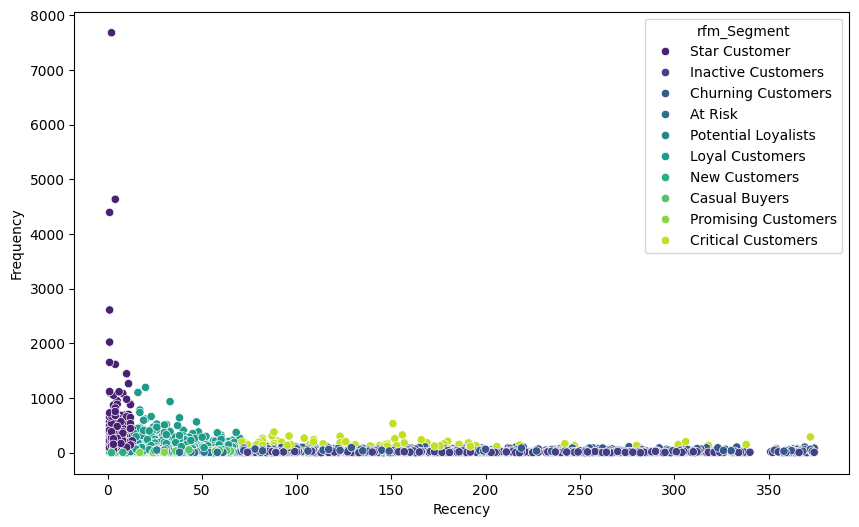

In [264]:
#plot scatterplot of the customers and respective segments
plt.figure(figsize=(10, 6))
print('The graph shows how the different segments would be divided regarding the frequency, recency and their assigned segment\nit is possible to see that there star customers would have low recency and higher frequency followed by potential loyalists. \nOther segments do not seem to show a clear patter since they are too scattered to easily generate insights.')
sns.scatterplot(data=customer_df, x='Recency', y='Frequency', hue='rfm_Segment', palette='viridis')

In the pie chart below we can see how the segmentation divides the monetary value brought by each segment.
 Star Customers and Loyal Customers once again have made up the vast majority of profit.
 soon we will apply classification algorythimns to see if in non biased enviroment that would still be the case


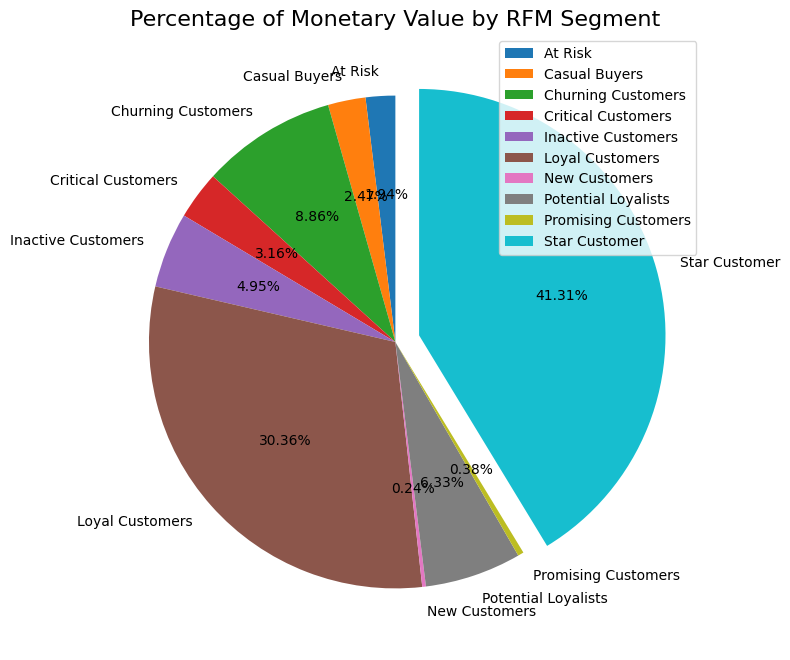

In [265]:
# Monetary value by RFM segment (assuming customer_df has an 'rfm_Segment' column)
rfm_monetary = customer_df.groupby('rfm_Segment')['Monetary'].sum()

# Number of customers in each RFM segment
rfm_counts = customer_df['rfm_Segment'].value_counts()

# Pie chart for monetary contribution by RFM segment
plt.figure(figsize=(10, 8))
explode = [0.1 if i == rfm_monetary.idxmax() else 0 for i in rfm_monetary.index]  # Highlight largest segment
rfm_monetary.plot(
    kind='pie',
    explode=explode,
    autopct='%1.2f%%',
    startangle=90,
    legend=True,
    cmap='tab10'
)
plt.title('Percentage of Monetary Value by RFM Segment', fontsize=16)
plt.ylabel('')
print('In the pie chart below we can see how the segmentation divides the monetary value brought by each segment.\n Star Customers and Loyal Customers once again have made up the vast majority of profit.\n Soon we will apply classification algorythimns to see if in non biased enviroment that would still be the case')
plt.show()

The numbers of each customer segment does not show a huge difference between all segments. 
The previous outliers Star Customers and Loyal Customers make up a good percentual group of the total.
It is possible to especulate that they would have much grater value than the others.


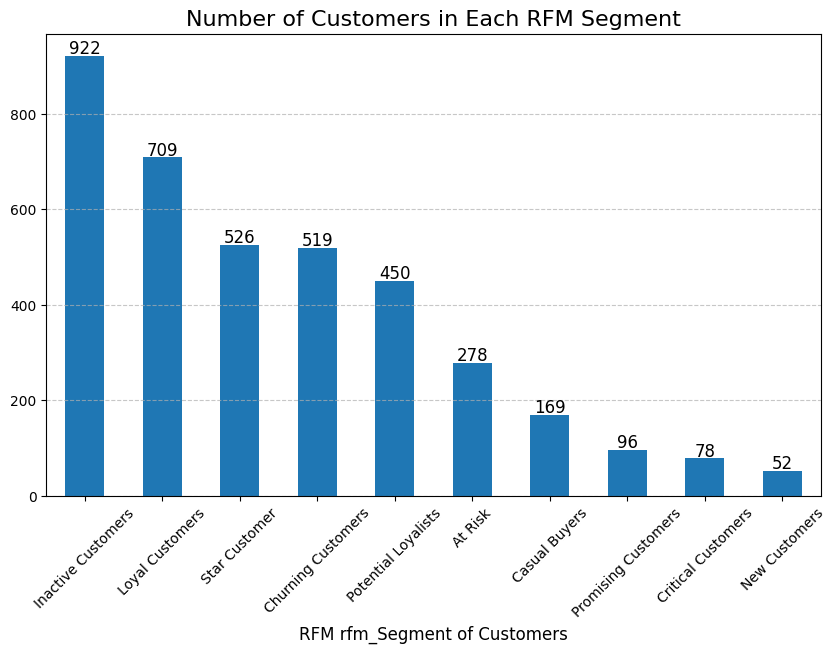

In [269]:
# Bar chart for customer distribution by RFM segment
plt.figure(figsize=(10, 6))
bars = rfm_counts.plot(
    kind='bar',
    cmap='tab10',
    stacked=True
)

# Add counts to the top of each bar
for index, value in enumerate(rfm_counts.values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=12)

plt.title('Number of Customers in Each RFM Segment', fontsize=16)
plt.xlabel('RFM rfm_Segment of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
print('The numbers of each customer segment does not show a huge difference between all segments. \nThe previous outliers Star Customers and Loyal Customers make up a good percentual group of the total.\nIt is possible to especulate that they would have much grater value than the others.')
plt.show()

##3.Data preprocessing and Classification Algorythmns

In [157]:
#Scale data to start the machine learning stage
scaler = pp.StandardScaler()
customer_scaled = scaler.fit_transform(customer_df[['Recency', 'Frequency', 'Monetary']])
customer_scaled

array([[-9.04496946e-01,  2.84662378e-02,  9.52077132e-01],
       [-9.14573436e-01,  2.05717197e+01,  1.11381695e+01],
       [-8.84343965e-01,  4.53268644e-01,  1.16456603e+00],
       ...,
       [-8.44038005e-01, -3.72470865e-01, -4.91735627e-01],
       [-8.84343965e-01,  3.19300551e+00,  4.85662586e-01],
       [-4.91360851e-01, -1.57683131e-01, -1.60979975e-02]])

In [179]:
# Dictionary to store cluster results
cluster_algorithms = {}

# 1. K-Means Clustering
kmeans = KMeans(n_clusters=6, random_state=50)
customer_df['Cluster_KMeans'] = kmeans.fit_predict(customer_scaled)
cluster_algorithms['K-Means'] = kmeans

# 2. DBSCAN Clustering
dbscan = DBSCAN(eps=5, min_samples=10)  # Adjust eps and min_samples
customer_df['Cluster_DBSCAN'] = dbscan.fit_predict(customer_scaled)
cluster_algorithms['DBSCAN'] = dbscan

# 3. Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=6)  # Adjust n_clusters
customer_df['Cluster_Agglo'] = agglo.fit_predict(customer_scaled)
cluster_algorithms['Agglomerative'] = agglo

# 4. OPTICS Clustering
optics = OPTICS(min_samples=10, eps=8)  # Adjust min_samples and eps
customer_df['Cluster_OPTICS'] = optics.fit_predict(customer_scaled)
cluster_algorithms['OPTICS'] = optics

In [271]:
silhouette_kmeans = silhouette_score(customer_scaled, customer_df['Cluster_KMeans'])
print(f"KMeans Silhouette Score: {silhouette_kmeans}")

silhouette_dbscan = silhouette_score(customer_scaled, customer_df['Cluster_DBSCAN'])
print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")

silhouette_agglo = silhouette_score(customer_scaled, customer_df['Cluster_Agglo'])
print(f"Agglomerative Silhouette Score: {silhouette_agglo}")

silhouette_optics = silhouette_score(customer_scaled, customer_df['Cluster_OPTICS'])
print(f"OPTICS Silhouette Score: {silhouette_optics}")

KMeans Silhouette Score: 0.47411132312573306
DBSCAN Silhouette Score: 0.9431114395105251
Agglomerative Silhouette Score: 0.5034262572534273
OPTICS Silhouette Score: -0.5960797504748359


In [181]:
print(customer_df['Cluster_KMeans'].value_counts())
print(customer_df['Cluster_DBSCAN'].value_counts())
print(customer_df['Cluster_Agglo'].value_counts())
print(customer_df['Cluster_OPTICS'].value_counts())

Cluster_KMeans
5    2063
1     916
3     640
0     166
4      11
2       3
Name: count, dtype: int64
Cluster_DBSCAN
 0    3795
-1       4
Name: count, dtype: int64
Cluster_Agglo
0    2300
1     844
4     578
3      64
5      10
2       3
Name: count, dtype: int64
Cluster_OPTICS
-1     3188
 26      36
 22      33
 9       25
 30      23
 15      23
 10      22
 21      22
 24      21
 25      20
 28      19
 35      18
 36      17
 14      17
 23      17
 27      17
 3       16
 20      16
 1       15
 13      15
 16      14
 29      14
 8       14
 12      13
 19      13
 34      13
 5       12
 0       12
 2       11
 37      11
 4       11
 7       11
 17      10
 11      10
 33      10
 18      10
 31      10
 6       10
 32      10
Name: count, dtype: int64


I first thought that DBScan was giving me the best clustering outcome, and tryed to increase it even more. Starting close to 0,75 i got it to go up to 0,94+, however later i found that it would just cluster everything together into one group. because of that it had such a high silhouette score. The other 2 best clustering methods were kmeans and agglo, which gave me very similar outputs shown above in value counts and plotted bellow. I chose to continue with kmeans since I am more familiar with the algorythmn and it shown slight better consistency on cluster variance.

After multiple adjustments "optics" kept showing too many clusters and was not considered useful moving forward.

###plots are inside this section

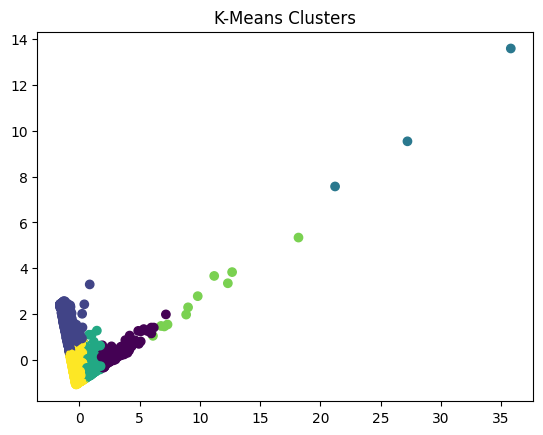

In [180]:
pca = PCA(n_components=2)
customer_pca = pca.fit_transform(customer_scaled)

#plot kmeans adding subtitles for each cluster and color
plt.scatter(customer_pca[:, 0], customer_pca[:, 1], c=customer_df['Cluster_KMeans'])
plt.title("K-Means Clusters")
plt.show()

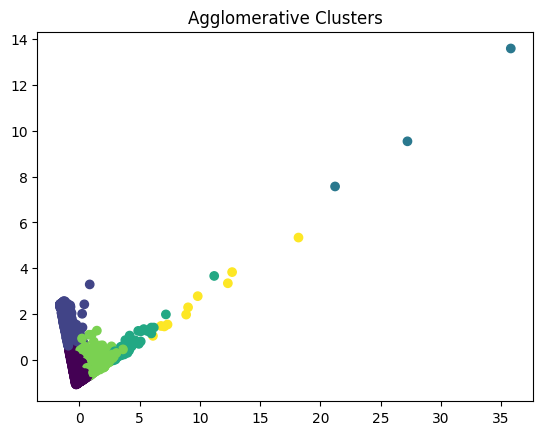

In [176]:
#plot aglo
plt.scatter(customer_pca[:, 0], customer_pca[:, 1], c=customer_df['Cluster_Agglo'])
plt.title("Agglomerative Clusters")
plt.show()

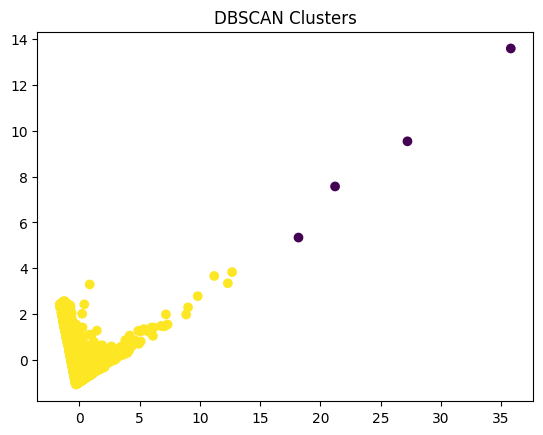

In [182]:
#plot dbscan
plt.scatter(customer_pca[:, 0], customer_pca[:, 1], c=customer_df['Cluster_DBSCAN'])
plt.title("DBSCAN Clusters")
plt.show()

##4.Customer segmentation with machine learning

In [183]:
customer_df['Cluster'] = kmeans.labels_
customer_df

,CustomerID,Recency,Frequency,Monetary,Recency_score,Frequency_score,rfm_Segment,rfm_Score,Cluster_KMeans,Cluster_DBSCAN,Cluster_Agglo,Cluster_OPTICS,Cluster
0,12747.0,2,92,3017.01,5,4,Star Customer,9,3,0,4,-1,3
1,12748.0,1,4396,23503.87,5,5,Star Customer,10,2,-1,2,-1,2
2,12749.0,4,181,3444.38,5,5,Star Customer,10,3,0,4,-1,3
3,12820.0,3,58,923.62,5,4,Star Customer,9,5,0,0,19,5
4,12821.0,214,6,92.72,1,1,Inactive Customers,2,1,0,1,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,18280.0,278,10,180.60,1,1,Inactive Customers,2,1,0,1,27,1
3795,18281.0,181,5,46.92,1,1,Inactive Customers,2,1,0,1,23,1
3796,18282.0,8,8,113.13,5,1,New Customers,6,5,0,0,9,5
3797,18283.0,4,755,2078.93,5,5,Star Customer,10,0,0,4,-1,0


In [204]:
# Define cluster names
cluster_names = {
    0: 'Loyal Customers',
    1: 'Infrequent Buyers',
    2: 'Big Accounts',
    3: 'Casual Customers',
    4: 'Developing Accounts',
    5: 'Ocasional Buyers'
}

#Analyse cluster characteristics
cluster_characteristics = customer_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'sum',
}).reset_index()

#rename clusters
cluster_characteristics['Cluster'] = cluster_characteristics['Cluster'].map(cluster_names)

# Display the cluster characteristics
print('Cluster characteristics (monetary value of cluster as a whole)')
print(cluster_characteristics)

#show mean monetary value of each cluster
print('\nMean monetary values of each cluster:')
print(customer_df.groupby('Cluster')['Monetary'].mean())

Cluster characteristics (monetary value of cluster as a whole)
               Cluster     Recency    Frequency     Monetary
0      Loyal Customers   12.427711   448.253012   965190.580
1    Infrequent Buyers  248.635371    26.638646   308304.021
2         Big Accounts    2.333333  5571.333333    99426.720
3     Casual Customers   26.235937   172.264062  1464897.920
4  Developing Accounts    5.545455  1125.636364   223389.440
5     Ocasional Buyers   49.411537    42.993214  1125810.643

Mean monetary values of each cluster:
Cluster
0     5814.401084
1      336.576442
2    33142.240000
3     2288.903000
4    20308.130909
5      545.715290
Name: Monetary, dtype: float64


- The dataframe above shows a brief description of each of the clusters and the importance of each group to the whole. The next section will be dedicated to better ilustrating how each of the clusters is important to the whole

- The mean monetary value shows that big accounts have a great importance to the daily operations of the business and should be handled with the proper atention.

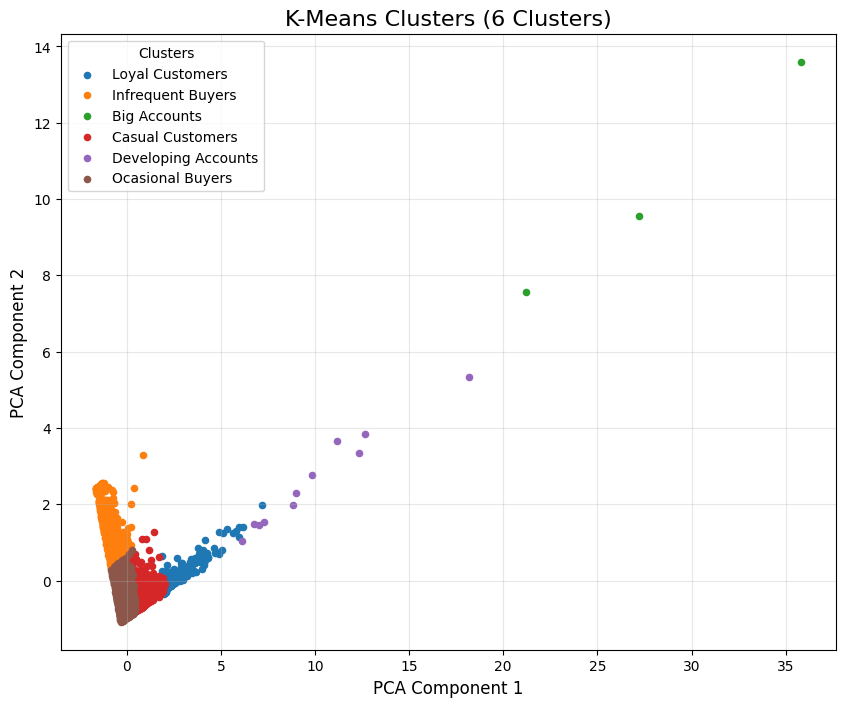

In [270]:
# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
customer_pca = pca.fit_transform(customer_scaled)

# Map cluster names to the cluster labels
customer_df['Segment'] = customer_df['Cluster'].map(cluster_names)

# Create scatter plot
plt.figure(figsize=(10, 8))
for cluster, label in cluster_names.items():
    cluster_points = customer_pca[customer_df['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=20, label=label)

plt.title("K-Means Clusters (6 Clusters)", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.legend(title="Clusters", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

Big Accounts: $99.426,72 - 2.37% 
Developing Accounts: $223.389,44 - 5.34% 
Infrequent Buyers: $308.304,02 - 7.36% 
Loyal Customers: $965.190,58 - 23.05% 
Ocasional Buyers: $1.125.810,64 - 26.89% 
Casual Customers: $1.464.897,92 - 34.99%


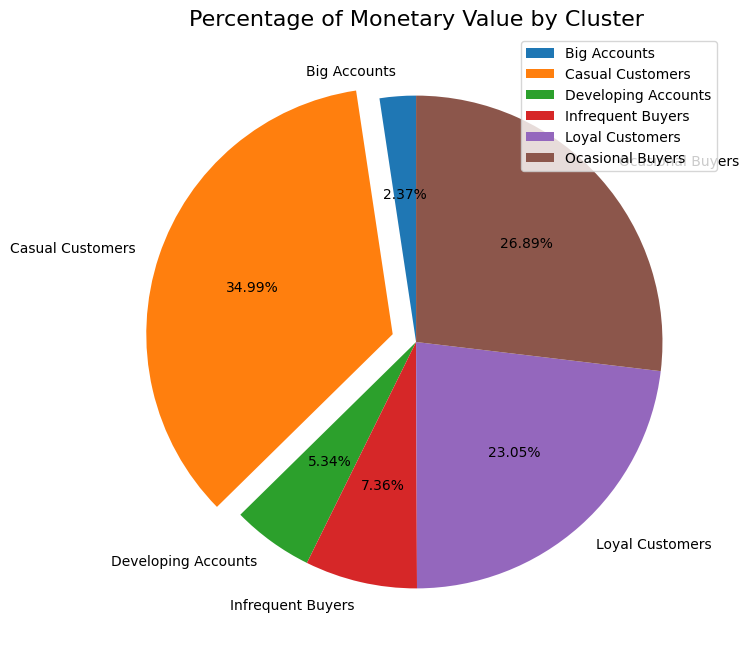

In [250]:
# Calculate the total monetary value for each cluster
monetary_by_cluster = customer_df.groupby('Segment')['Monetary'].sum()

# Pie chart for monetary contribution by cluster
plt.figure(figsize=(10, 8))
explode = [0.1 if i == monetary_by_cluster.idxmax() else 0 for i in monetary_by_cluster.index]  # Highlight the largest cluster
monetary_by_cluster.plot(
    kind='pie',
    explode=explode,
    autopct='%1.2f%%',
    startangle=90,
    legend=True
)

print('Big Accounts: $99.426,72 - 2.37% \nDeveloping Accounts: $223.389,44 - 5.34% \nInfrequent Buyers: $308.304,02 - 7.36% \nLoyal Customers: $965.190,58 - 23.05% \nOcasional Buyers: $1.125.810,64 - 26.89% \nCasual Customers: $1.464.897,92 - 34.99%')
plt.title('Percentage of Monetary Value by Cluster', fontsize=16)
plt.ylabel('')  # Remove the y-axis label for a cleaner pie chart
plt.show()

This pie chart illustrates the percentage contribution of monetary value by each customer cluster, based on the segmentation performed. Here is a brief description:

	-	Casual Customers contribute the largest share of monetary value at 34.99%, indicating this group represents the most revenue.
	-	Occasional Buyers account for 26.89%, showing they are also significant contributors to revenue despite likely less frequent purchases.
	-	Loyal Customers contribute 23.05%, reflecting their strong and consistent spending patterns.
	-	Infrequent Buyers contribute 7.36%, indicating they provide less value compared to other groups.
	-	Developing Accounts contribute 5.34%, showing potential but a relatively smaller impact on revenue.
	-	Big Accounts make up only 2.37% of the total monetary value, likely indicating a small number of customers with very high individual contributions.

This chart provides insight into the revenue distribution across clusters, helping identify which customer groups are the most financially significant. It suggests focusing marketing efforts on Casual Customers, Occasional Buyers, and Loyal Customers while finding strategies to grow Developing Accounts and engage Infrequent Buyers.

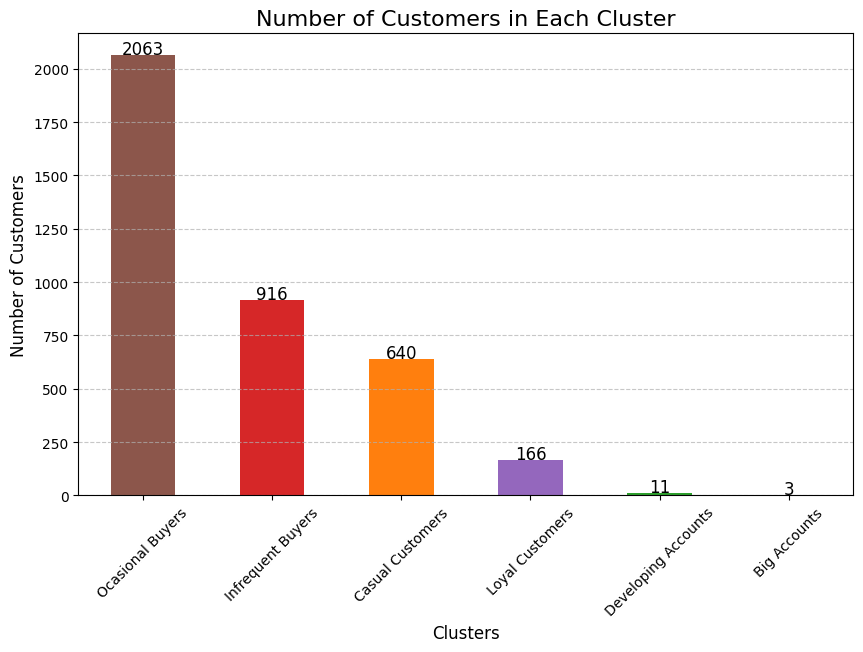

In [233]:
# Calculate the number of customers in each cluster
cluster_counts = customer_df['Segment'].value_counts()

# Bar chart for customer distribution by cluster
plt.figure(figsize=(10, 6))
cluster_counts.plot(
    kind='bar',
    color=['#8c564b', '#d62728', '#ff7f0e', '#9467bd', '#2ca02c', '#1f77b4'],
)

for index, value in enumerate(cluster_counts.values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=12)

print('The ocasional buyers make up the biggest cluster of customers ')
plt.title('Number of Customers in Each Cluster', fontsize=16)
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This bar chart shows the number of customers in each cluster, complementing the previous pie chart on monetary contribution. Here’s the breakdown and comparison:

 1. Occasional Buyers (2,063 customers):

 This is the largest cluster by customer count.

 While they contribute significantly to monetary value (26.89% from the previous chart), their per-customer value is likely lower than other clusters, given their large size.

2.  Infrequent Buyers (916 customers):

 This is the second-largest group but only contributes 7.36% to the total monetary value, highlighting their low spending per customer.

3.  Casual Customers (640 customers):

 Despite being smaller than Occasional Buyers, they contribute the most to monetary value (34.99% from the pie chart).

 This indicates higher average spending per customer compared to other clusters.

4.  Loyal Customers (166 customers):

 A relatively small group, contributing 23.05% of the monetary value.

 This reflects their high value per customer and consistent spending patterns.


5.  Developing Accounts (11 customers):

 A very small group, contributing 5.34% to monetary value.

 While their size is negligible, they represent potential high-value customers.


6.  Big Accounts (3 customers):

 The smallest group, contributing 2.37% to monetary value.

 These are outliers with very high individual spending, despite their small size.


  

##5.Conclusion:

An RFM analysis (Recency, Frequency, Monetary) is a widely used framework for customer segmentation, enabling businesses to understand and categorize their customers based on transactional behavior. It can be conducted both with and without machine learning classification algorithms, and each approach has its distinct advantages.

---

RFM Analysis Without Machine Learning

In a traditional RFM analysis, customer segments are created manually using business rules and thresholds, often based on quantiles or pre-defined ranges for the RFM scores. For example, customers with high frequency and low recency may be labeled “Loyal,” while those with low frequency and high recency could be labeled “At-Risk.” This method is straightforward and allows for a direct understanding of the segmentation logic.

However, this approach is inherently subjective—the segmentation depends on the specific thresholds or rules applied. While it provides quick insights, it may overlook nuanced patterns in the data, such as overlapping behaviors or hidden subgroups that are not captured by rigid rules.

---

RFM Analysis With Machine Learning Classification Algorithms

When machine learning algorithms, such as K-Means clustering or DBSCAN, are introduced, the segmentation becomes more data-driven. Clustering methods group customers based on the inherent structure of the data, rather than relying on predefined thresholds. This approach can uncover hidden relationships and more granular customer segments, such as “Developing Accounts” or “Big Accounts,” which may not be immediately apparent in a manual analysis.

For example, in our analysis:
- Manual RFM segmentation identified 10 broad customer profiles, such as “Champions” and “Hibernating,” which provided a good baseline for understanding customer behavior.
- Machine learning uncovered 6 distinct clusters, with more focus on nuanced behaviors like “Loyal Customers,” “Occasional Buyers,” and “Casual Customers,” offering actionable insights into spending patterns.

---

Importance of an Unbiased Analysis

Machine learning introduces the benefit of objectivity, as it relies purely on the data structure rather than human assumptions. This minimizes bias and ensures the results reflect the true characteristics of the dataset. However, it is crucial to validate the machine learning outputs with domain expertise to ensure the clusters are meaningful and actionable.

For example, our results showed:
- RFM segmentation provided easily interpretable groups but lacked granularity for identifying smaller, high-potential clusters.
- Clustering analysis highlighted previously unseen patterns, such as the significant monetary contribution of smaller clusters like “Casual Customers” and “Loyal Customers,” which would have been lumped into broader categories in a manual RFM analysis.

---

Conclusion

While traditional RFM segmentation offers simplicity and interpretability, incorporating machine learning enhances the depth of insights by creating unbiased and data-driven segments. Together, these approaches provide a robust framework for customer analysis, ensuring businesses can leverage both human intuition and advanced algorithms to optimize decision-making.

##6.Recomendations:

Recommendations for Each Customer Cluster

  1.	Big Accounts:
-	Account-Based Marketing (ABM): Develop personalized strategies to strengthen relationships with these high-value customers.
-	Improve Logistics and Support: Ensure smooth operations, reliable deliveries, and dedicated account management to enhance their experience.
-	Rapport Building: Regular check-ins, exclusive offers, and invitations to special events can further solidify loyalty.
-	Upselling and Cross-Selling: Identify complementary products or services tailored to their needs to maximize value.

  2.	Developing Accounts:
-	Dedicated Attention: Assign account managers or specific touchpoints to understand their needs and growth potential.
-	Elevate to Big Accounts: Provide targeted offers, loyalty programs, or custom solutions to encourage larger and more frequent purchases.
-	Feedback Loops: Actively collect feedback to address any barriers preventing them from becoming high-value customers.

  3.	Loyal Customers:
-	Incentivize Advocacy: Reward their loyalty with referral programs, branded merchandise, or VIP perks to turn them into brand ambassadors.
-	Maintain Engagement: Offer exclusive discounts, early access to products, or personalized thank-you notes to show appreciation.
-	Tailored Campaigns: Design campaigns that celebrate milestones, such as anniversaries of purchases, to reinforce emotional connections with the brand.

  4.	Casual Customers:
-	Deep Dive Analysis: Understand their purchasing habits and preferences to identify what drives their behavior.
-	Incentivize Continued Behavior: Use loyalty programs, discounts on their favorite items, or limited-time promotions to encourage consistency.
-	Engagement Campaigns: Develop storytelling campaigns or interactive content to deepen their connection to the brand.

  5.	Occasional Buyers:
-	Increase Frequency: Create reactivation campaigns with personalized offers, reminders, or discounts tied to their past purchases.
-	Transition to Loyal Customers: Highlight the benefits of being a frequent buyer, such as exclusive discounts or access to loyalty tiers.
-	Address Barriers: Use surveys or behavior analysis to identify reasons for their infrequent purchasing and address pain points.

  6.	Infrequent Buyers:
-	Increase Engagement: Create targeted campaigns that highlight frequently purchased products and suggest complementary items.
-	Upselling and Bundling: Bundle products they’ve shown interest in with related items to increase basket size.
-	Understand and Reactivate: Analyze their purchase history to better understand what they’re buying and design campaigns that meet their interests or solve potential barriers to re-engagement.

---

General Strategies Across Clusters
-	Personalization: Leverage customer data to personalize communication and offers for each cluster.
-	Segmentation-Based Communication: Ensure campaigns, messaging, and offers are tailored to the unique characteristics of each group.
-	Monitor Metrics: Regularly track KPIs such as recency, frequency, and monetary value for each segment to adapt strategies over time.
-	Feedback Mechanisms: Introduce surveys, focus groups, or customer interviews to continuously refine your understanding of each cluster.

By implementing these targeted strategies, the business can strengthen customer relationships, increase engagement, and optimize revenue across all segments.